Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Classifier accuracy(from interval [0,1]): 1.0


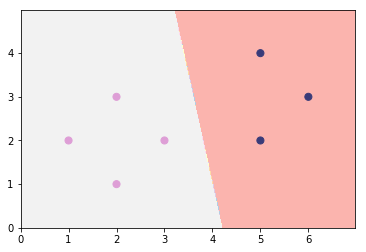

In [5]:
seven_classifier = RidgeClassifier(alpha=0)
seven_classifier.fit(seven_X, seven_y)
print(f"Classifier accuracy(from interval [0,1]): {accuracy_score(seven_classifier.predict(seven_X), seven_y)}")
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=seven_classifier.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Classifier accuracy(from interval [0,1]): 1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


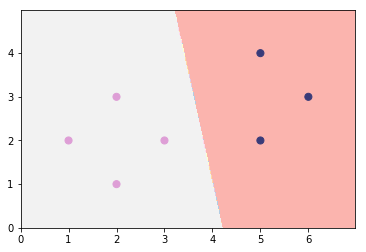

In [6]:
seven_linear_reg = LinearRegression()
seven_linear_reg.fit(seven_X, seven_y)
seven_predicted = [1 if x >= 0.5 else 0 for x in seven_linear_reg.predict(seven_X)]
print(f"Classifier accuracy(from interval [0,1]): {accuracy_score(seven_predicted, seven_y)}")
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x: (seven_linear_reg.predict(x) >= 0.5))

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Classifier accuracy(from interval [0,1]): 0.875


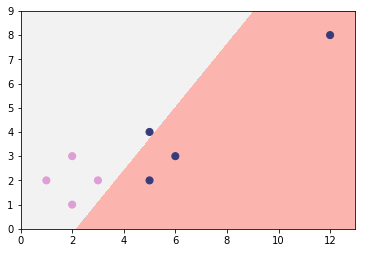

In [8]:
outlier_classifier = RidgeClassifier(alpha=0)
outlier_classifier.fit(outlier_X, outlier_y)
print(f"Classifier accuracy(from interval [0,1]): {accuracy_score(outlier_classifier.predict(outlier_X), outlier_y)}")
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=outlier_classifier.predict)

Classifier accuracy(from interval [0,1]): 0.875


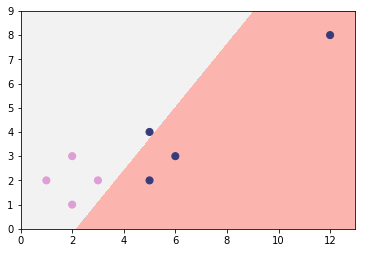

In [9]:
outlier_linear_reg = LinearRegression()
outlier_linear_reg.fit(outlier_X, outlier_y)
outlier_predicted = [1 if x >= 0.5 else 0 for x in outlier_linear_reg.predict(outlier_X)]
print(f"Classifier accuracy(from interval [0,1]): {accuracy_score(outlier_predicted, outlier_y)}")
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x: (outlier_linear_reg.predict(x) >= 0.5))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Classifier accuracy(from interval [0,1]): 0.875


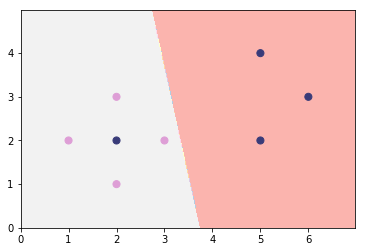

In [11]:
unsep_classifier = RidgeClassifier(alpha=0)
unsep_classifier.fit(unsep_X, unsep_y)
print(f"Classifier accuracy(from interval [0,1]): {accuracy_score(unsep_classifier.predict(unsep_X), unsep_y)}")
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=unsep_classifier.predict)

Classifier accuracy(from interval [0,1]): 0.875


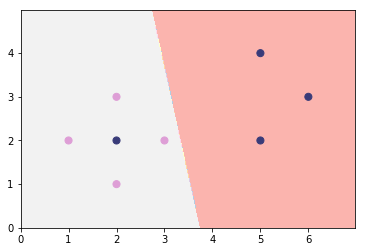

In [12]:
unsep_linear_reg = LinearRegression()
unsep_linear_reg.fit(unsep_X, unsep_y)
outlier_predicted = [1 if x >= 0.5 else 0 for x in unsep_linear_reg.predict(unsep_X)]
print(f"Classifier accuracy(from interval [0,1]): {accuracy_score(outlier_predicted, unsep_y)}")
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x: (unsep_linear_reg.predict(x) >= 0.5))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

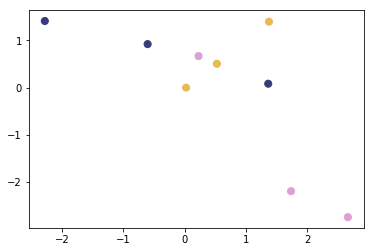

In [13]:
from sklearn.datasets import make_classification

generated_X, generated_y = make_classification(
    n_samples=9,
    n_classes=3,
    n_clusters_per_class=1,
    n_features=2,
    n_redundant=0,
    n_repeated=0)
mlutils.plot_2d_clf_problem(generated_X, generated_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [14]:
def convert_y_to_ovr_y(dataset_y, class_label):
    return [1 if y == class_label else 0 for y in dataset_y]

def create_trained_ovr_classifier(X, ovr_y):
    classifier = LinearRegression()
    classifier.fit(X, ovr_y)
    return classifier

def calcualte_classifier_accuracy(X, ovr_y, classifier):
    predicted_y = [1 if x >= 0.5 else 0 for x in classifier.predict(X)]
    return accuracy_score(predicted_y, ovr_y)

0_vs_rest accuracy: 0.8888888888888888
1_vs_rest accuracy: 0.6666666666666666
2_vs_rest accuracy: 0.8888888888888888


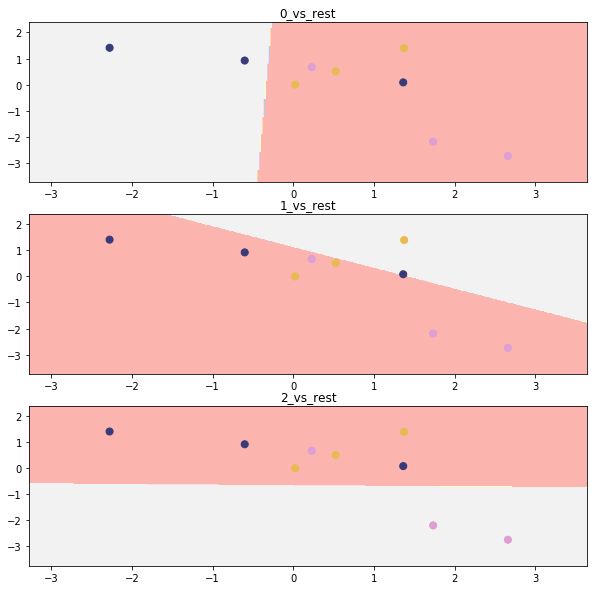

In [15]:
plt.figure(figsize=(10,10))
for i in range(3):
    ovr_y = convert_y_to_ovr_y(generated_y, i)
    classifier = create_trained_ovr_classifier(generated_X, ovr_y)
    print(f"{i}_vs_rest accuracy: {calcualte_classifier_accuracy(generated_X, ovr_y, classifier)}")
    plt.subplot(3,1, i + 1)
    plt.title(f"{i}_vs_rest")
    mlutils.plot_2d_clf_problem(generated_X, generated_y, h=lambda x: (classifier.predict(x) >= 0.5))
plt.show()

In [16]:
class OVR_Classifier:
    def __init__(self, n_classes):
        self.classifiers = []
        self.classifiers_num = n_classes
    
    def fit(self, X, y):
        self.classifiers = []
        for i in range(self.classifiers_num):
            self.classifiers.append(
                create_trained_ovr_classifier(X, convert_y_to_ovr_y(y, i)))
    
    def predict(self, X):
        return np.argmax([classifier.predict(X) for classifier in self.classifiers], axis=0)

Classifier accuracy(from interval [0,1]): 0.6666666666666666


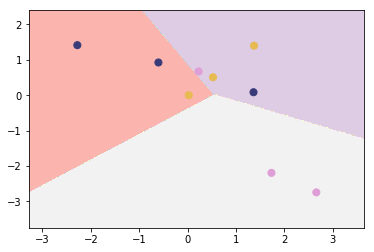

In [17]:
# TODO skuzi argmax s axisis i bez
custom_ovr_classifier = OVR_Classifier(3)
custom_ovr_classifier.fit(generated_X, generated_y)
accuracy = accuracy_score(custom_ovr_classifier.predict(generated_X), generated_y)
print(f"Classifier accuracy(from interval [0,1]): {accuracy}")
mlutils.plot_2d_clf_problem(generated_X, generated_y, h=custom_ovr_classifier.predict)

Classifier accuracy(from interval [0,1]): 0.6666666666666666


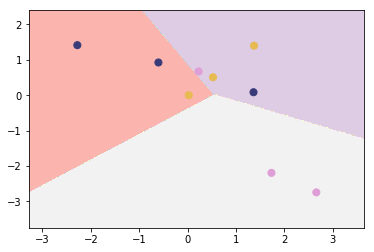

In [18]:
generated_classifier = RidgeClassifier(alpha=0)
# do we need alpha=0
generated_classifier.fit(generated_X, generated_y)
accuracy = accuracy_score(generated_classifier.predict(generated_X), generated_y)
print(f"Classifier accuracy(from interval [0,1]): {accuracy}")
mlutils.plot_2d_clf_problem(generated_X, generated_y, h=generated_classifier.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [19]:
def sigmoid_function(x, alpha=1):
    return 1/(1 + exp(- alpha * x))

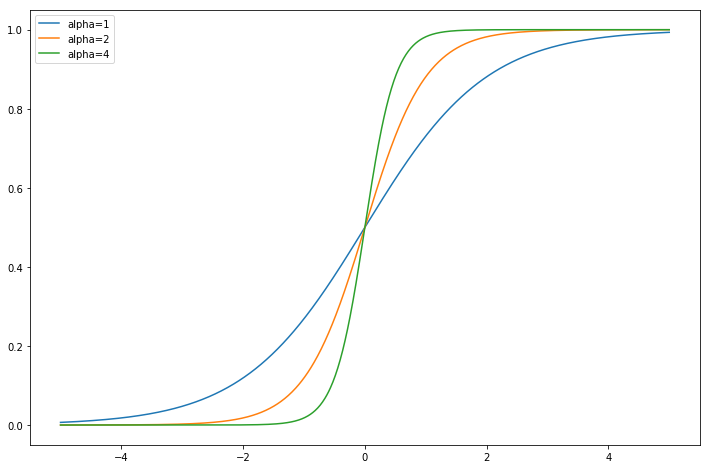

In [20]:
alpha_x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(12, 8))
for alpha in [1, 2, 4]:
    alpha_y = [sigmoid_function(x, alpha) for x in alpha_x]
    plt.plot(alpha_x, alpha_y, label=f"alpha={alpha}")
plt.legend()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [21]:
from numpy.linalg import norm

In [22]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):   
    w_len = X.shape[1] + 1
    weights = np.zeros(w_len)
    weights_trace = []
    last_iter_err = 99999
    for iter in range(max_iter):
        weights_delta = np.zeros(w_len)
        w0_delta = 0
        for i in range(X.shape[0]):
            h = lr_h(X[i], weights)
            w0_delta += h - y[i]
            weights_delta = np.add(weights_delta, (h - y[i]) * np.append(1, X[i]))
        w0 = weights[0]
        w0 -= eta * w0_delta
        weights = np.subtract((1 - alpha * eta) * weights, weights_delta * eta)
        weights[0] = w0
        if trace:
            weights_trace.append(weights)
        error = cross_entropy_error(X, y, weights) + alpha * norm(weights)
#         if  abs(last_iter_err - error) < epsilon:
        if  error < epsilon:
            break
        last_iter_err = error
    return weights, weights_trace
    
def lr_h(x, w):
    return sigmoid_function(np.dot(w, np.append(1, x)))

def cross_entropy_error(X, y, w):
    return np.sum([
        - y[i] * np.log(lr_h(X[i], w)) - (1. - y[i])*np.log(1. - lr_h(X[i], w)) 
        for i in range(y.shape[0])]) / X.shape[0]
    

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [23]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Iterations number: 2000
Cross-entropy error: 0.07751718252492557


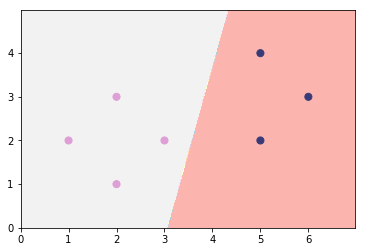

In [25]:
w, trace = lr_train(seven_X, seven_y, trace=True)
print(f"Iterations number: {len(trace)}")
print(f"Cross-entropy error: {cross_entropy_error(seven_X, seven_y, w)}")
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=lambda x: lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [26]:
from sklearn.metrics import zero_one_loss

In [27]:
def calculate_cross_entropy_by_iteration(X, y, trace):
    ce_errors = []
    for w in trace:
        ce_errors.append(cross_entropy_error(X, y, w))
    return ce_errors

def calculate_zero_one_by_iteration(X, y, trace):
    ce_errors = []
    for w in trace:
        h = [lr_h(x, w) >= 0.5 for x in X]
        ce_errors.append(zero_one_loss(y, h))
    return ce_errors

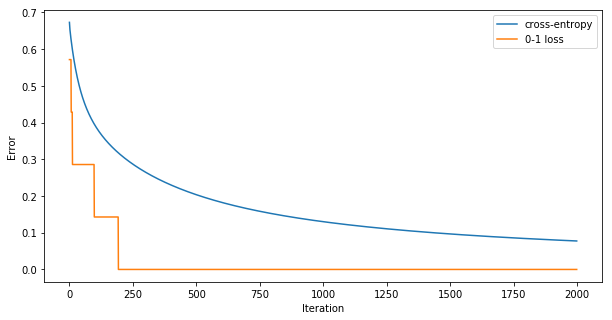

In [28]:
weights, trace = lr_train(seven_X, seven_y, trace=True)

plt.figure(figsize=(10,5))
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(range(len(trace)), calculate_cross_entropy_by_iteration(seven_X, seven_y, trace), label="cross-entropy")
plt.plot(range(len(trace)), calculate_zero_one_by_iteration(seven_X, seven_y, trace), label="0-1 loss")
plt.legend()
plt.show()

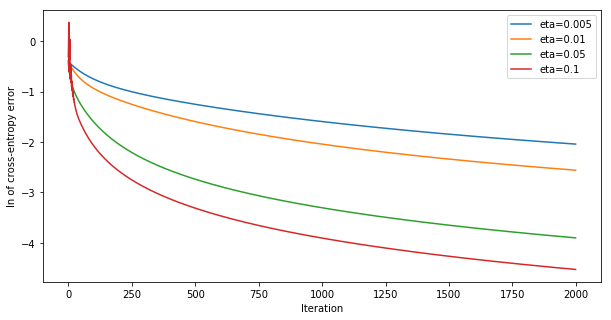

In [29]:
plt.figure(figsize=(10,5))
plt.xlabel("Iteration")
plt.ylabel("ln of cross-entropy error")
for eta in [0.005, 0.01, 0.05, 0.1]:
    weights, trace = lr_train(seven_X, seven_y, trace=True, eta=eta, epsilon=1E-8)
#     err_by_iter = calculate_cross_entropy_by_iteration(trace)
    err_by_iter = [math.log(x) for x in calculate_cross_entropy_by_iteration(seven_X, seven_y, trace)]
    plt.plot(range(len(trace)), err_by_iter, label=f"eta={eta}")
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [33]:
from sklearn.linear_model import LogisticRegression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.875


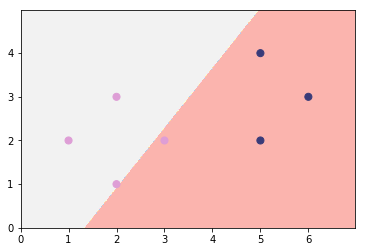

In [50]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(seven_X, seven_y)
print(f"Score: {log_reg.score(outlier_X, outlier_y)}")
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=log_reg.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

In [51]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.875


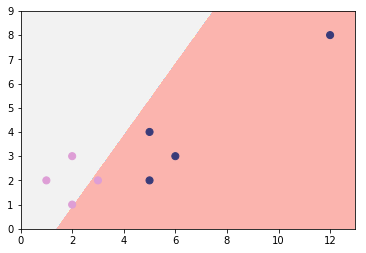

In [52]:
logistic_regression_outlier = LogisticRegression(max_iter=10000)
logistic_regression_outlier.fit(outlier_X, outlier_y)
print(f"Score: {logistic_regression_outlier.score(outlier_X, outlier_y)}")
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=logistic_regression_outlier.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


In [53]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [54]:
def calculate_trace(X, y, iters):
    weights, trace = lr_train(X, y, trace=True, max_iter=iters, epsilon=1E-8)
    trace = np.array(trace)
    w0 = trace[:, 0]
    w1 = trace[:, 1]
    w2 = trace[:, 2]
    h = []
    for w in trace:
        h.append([lr_h(x, w) for x in X])
    return w0, w1, w2, h

def plot_weights_and_prediction(w0, w1, w2, h, iters):
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    plt.xlabel('Iterations')
    plt.ylabel('h(x)')
    h = np.array(h)
    for i in range(len(h[0])):
        plt.plot(range(iters), h[:, i], label=f"h[{i}]")
    plt.legend()
    plt.subplot(2,1, 2)
    plt.xlabel('Iterations')
    plt.ylabel('Weight')
    plt.plot(range(iters), w0, label="w0")
    plt.plot(range(iters), w1, label="w1")
    plt.plot(range(iters), w2, label="w2")

    plt.legend()
    plt.show()    

[[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]]


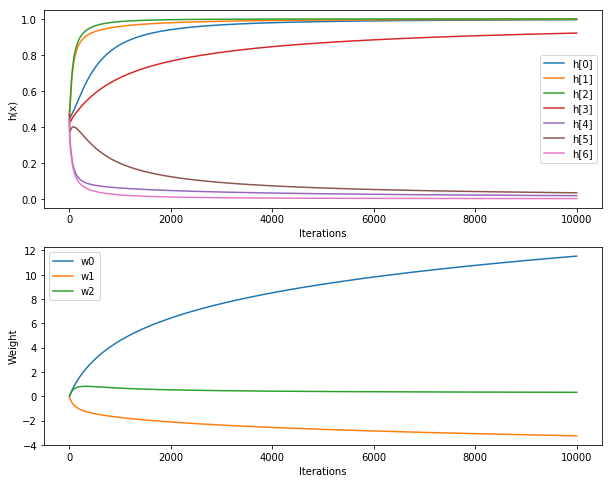

In [55]:
iters = 10000
w0, w1, w2, h = calculate_trace(seven_X, seven_y, iters)
print(seven_X)
plot_weights_and_prediction(w0, w1, w2, h, iters)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

[[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]
 [2 2]]


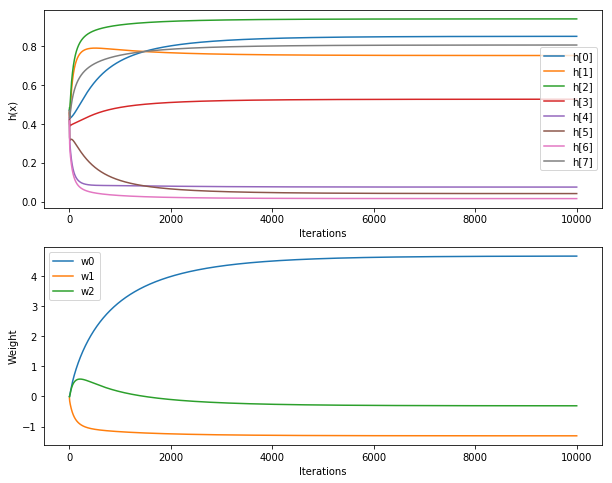

In [57]:
iters = 10000
print(unsep_X)
w0, w1, w2, h = calculate_trace(unsep_X, unsep_y, iters)
plot_weights_and_prediction(w0, w1, w2, h, iters)

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [58]:
from numpy.linalg import norm

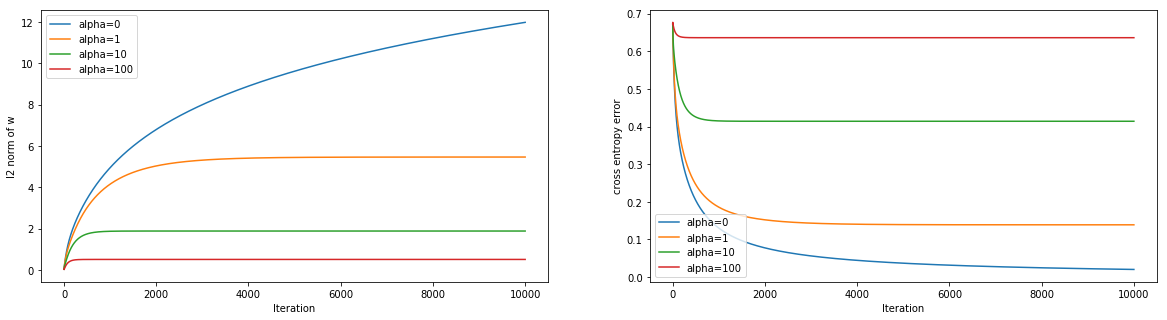

In [60]:
#TODO: je li ok score uzet, sto cu sa 0
w_norm_values = []
cross_entropy_error_values = []
alphas = [0, 1, 10, 100];
iters = 10000
for alpha in alphas:
    weights, trace = lr_train(seven_X, seven_y, max_iter=iters, alpha=alpha, trace=True)
    cross_entropy_error_values.append([cross_entropy_error(seven_X, seven_y, w) for w in trace])
    w_norm_values.append([norm(w) for w in trace])
    
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel("Iteration")
plt.ylabel("l2 norm of w")
for i in range(len(alphas)):
    l = len(w_norm_values[i])
    plt.plot(range(l), w_norm_values[i], label=f"alpha={alphas[i]}")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Iteration")
plt.ylabel("cross entropy error")
for i in range(len(alphas)):
    l = len(cross_entropy_error_values[i])
    plt.plot(range(l), cross_entropy_error_values[i], label=f"alpha={alphas[i]}")
plt.legend()
plt.show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

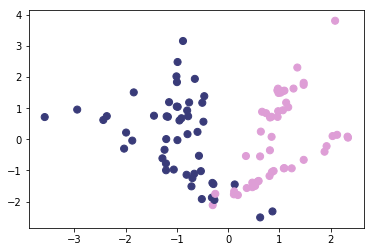

In [473]:
X, y = make_classification(n_classes=2, n_samples=100, n_clusters_per_class=2,
                              n_features=2, n_informative=2, n_redundant=0, n_repeated=0)
mlutils.plot_2d_clf_problem(X, y)

In [474]:
from sklearn.preprocessing import PolynomialFeatures
def fit_and_plot_lin_reg(d):
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X)
    model = LogisticRegression(C=0.5)
    model.fit(phi, y)
    print(f"d={d} Score: {model.score(phi, y)}")
    mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


d=2 Score: 0.95
d=3 Score: 0.96


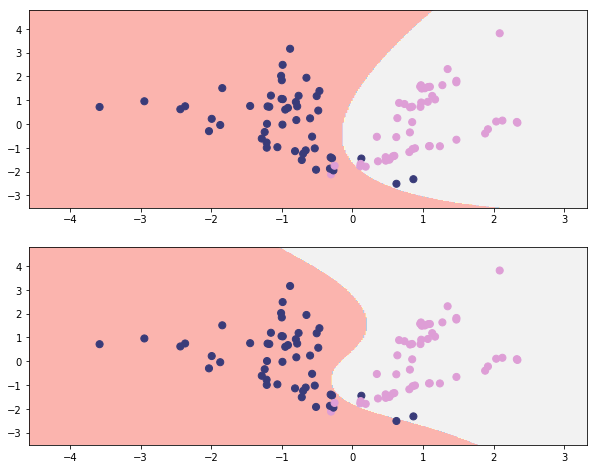

In [475]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
fit_and_plot_lin_reg(2)
plt.subplot(2,1,2)
fit_and_plot_lin_reg(3)

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

In [476]:
from sklearn.model_selection import train_test_split

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
lambdas = [0.001, 0.05, 0.1, 0.5, 0.8, 1, 2, 5, 10, 50, 100]

In [487]:
def find_min_test_error(d, X_train, X_test, y_train, y_test, lambdas):
    poly = PolynomialFeatures(d)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.transform(X_test)
    max_test_score = 0
    best_lmbda = 0
    for lmbda in lambdas: 
        model = LogisticRegression(C=1./lmbda, solver='sag', max_iter=5000)
        model.fit(phi_train, y_train)
        test_score = model.score(phi_test, y_test)
        if max_test_score < test_score:
            max_test_score = test_score
            best_lmbda = lmbda
    return max_test_score, best_lmbda

def plot_calssification_result(d, lmbda, X, y):
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X)
    model = LogisticRegression(C=1./lmbda, solver='sag', max_iter=5000)
    model.fit(phi, y)
    plt.figure(figsize=(9,5))
    mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

Max test score for d=2: 0.975, lambda: 0.001


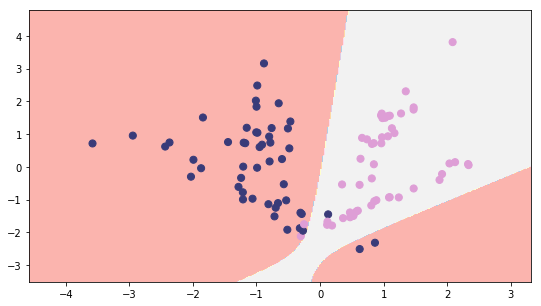

In [488]:
max_test_score, lmbda = find_min_test_error(2, X_train, X_test, y_train, y_test, lambdas)
print(f"Max test score for d=2: {max_test_score}, lambda: {lmbda}")
plot_calssification_result(2, lmbda, X, y)

Max test score for d=3: 0.95, lambda: 0.001


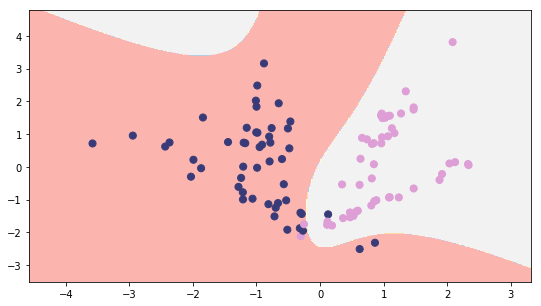

In [489]:
max_test_score, lmbda = find_min_test_error(3, X_train, X_test, y_train, y_test, lambdas)
print(f"Max test score for d=3: {max_test_score}, lambda: {lmbda}")
plot_calssification_result(3, lmbda, X, y)